In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
first_round = pd.read_csv('first_round.csv')
second_round = pd.read_csv('second_round.csv')

In [ ]:
first_round = first_round.filter(regex='^(?!.*Unnamed)')

In [ ]:
def lowercase_string(x):
    if isinstance(x, str):
        x = x.lower().replace('_', '').replace(' ', '').replace('association','relationship')
        x = x.replace('2shots', '2shot')
        x = x.replace('gpt3.5', 'chat')
        x = x.replace('-', '')
        x = x.replace('block223', 'block')
    return x

first_round = first_round.applymap(lowercase_string)
second_round = second_round.applymap(lowercase_string)

In [ ]:
def element_to_metric(x):
    metrics = ['precision', 'recall', 'f1']
    return {
        metric: x[metric] for metric in metrics
    }

def df_to_dict(df):
    dict_df = df.apply(element_to_metric, axis=1).to_list()
    print(dict_df)
    keys = df['Setting'] + '_' + df['LLM']+ '_' + df['ModelID']+ '_' + df['ModelElement']
    return dict(zip(keys, dict_df))

def collect_settings(first_round, second_round, metric='f1'):
    # second round contains more configurations so we start from the first round
    first_round_dict = df_to_dict(first_round)
    second_round_dict = df_to_dict(second_round)
    print(first_round_dict.keys())
    print(second_round_dict.keys())
    second_round_dict = {key: second_round_dict[key] for key, value in first_round_dict.items()}
    return first_round_dict, second_round_dict


In [ ]:
dict1, dict2 = collect_settings(first_round, second_round)

[{'precision': 0.9256, 'recall': 0.4375, 'f1': 0.5942}, {'precision': 0.9167, 'recall': 0.4615, 'f1': 0.6139}, {'precision': 0.8333, 'recall': 0.4688, 'f1': 0.6}, {'precision': 0.8182, 'recall': 0.413, 'f1': 0.5489}, {'precision': 1.0, 'recall': 0.25, 'f1': 0.4}, {'precision': 0.8571, 'recall': 0.4, 'f1': 0.5455}, {'precision': 1.0, 'recall': 0.2778, 'f1': 0.4348}, {'precision': 0.5625, 'recall': 0.2895, 'f1': 0.3823}, {'precision': 0.8148, 'recall': 0.3721, 'f1': 0.5109}, {'precision': 0.8261, 'recall': 0.6304, 'f1': 0.7151}, {'precision': 0.6944, 'recall': 0.5625, 'f1': 0.6215}, {'precision': 0.5, 'recall': 0.4654, 'f1': 0.4821}, {'precision': 0.7, 'recall': 0.23, 'f1': 0.3462}, {'precision': 0.3824, 'recall': 0.2333, 'f1': 0.2898}, {'precision': 0.1316, 'recall': 0.125, 'f1': 0.1282}, {'precision': 0.413, 'recall': 0.3125, 'f1': 0.3558}, {'precision': 0.6429, 'recall': 0.25, 'f1': 0.36}, {'precision': 0.4167, 'recall': 0.1316, 'f1': 0.2}, {'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [ ]:
keys = [key for key in list(dict1.keys())]
x = np.array([dict1[key]['f1'] for key in keys])
y = np.array([dict2[key]['f1'] for key in keys])

(array([21., 19., 26., 30., 30., 35., 26., 27., 21.,  5.]),
 array([0.     , 0.08648, 0.17296, 0.25944, 0.34592, 0.4324 , 0.51888,
        0.60536, 0.69184, 0.77832, 0.8648 ]),
 <BarContainer object of 10 artists>)

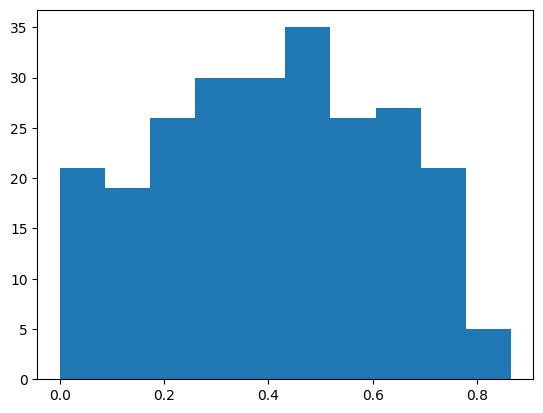

In [ ]:
plt.hist(x)

In [ ]:

stats.ttest_1samp(abs(x - y), 0.04)

TtestResult(statistic=-0.04133979988712646, pvalue=0.9670595182202808, df=239)

In [ ]:
result = stats.wilcoxon(abs(x - y), alternative='greater', method='approx')

In [ ]:
result.statistic / len(x)

110.6875

In [ ]:
len(x)

240

In [ ]:
result.zstatistic / np.sqrt(len(x))

0.8487162924424213

In [ ]:
from numpy import std, mean, sqrt

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)


In [ ]:
cohen_d(y, x)

0.10092773908015928

In [ ]:
y

[0.59477,
 0.61395,
 0.61381,
 0.56782,
 0.4,
 0.54545,
 0.53061,
 0.47351,
 0.48165,
 0.6564,
 0.71795,
 0.46573,
 0.35745,
 0.2766,
 0.22291,
 0.39347,
 0.36,
 0.22901,
 0.05405,
 0.18182,
 0.0,
 0.14815,
 0.14815,
 0.06897,
 0.6087,
 0.71168,
 0.53226,
 0.62687,
 0.66667,
 0.66272,
 0.56075,
 0.53061,
 0.47191,
 0.6389,
 0.55556,
 0.40678,
 0.41369,
 0.44681,
 0.18792,
 0.18605,
 0.53388,
 0.53217,
 0.35813,
 0.29412,
 0.35731,
 0.17857,
 0.3,
 0.18519,
 0.69388,
 0.63158,
 0.66812,
 0.59545,
 0.47619,
 0.63636,
 0.64706,
 0.52601,
 0.43567,
 0.62745,
 0.60847,
 0.4214,
 0.31373,
 0.31707,
 0.09626,
 0.31291,
 0.50609,
 0.34351,
 0.25758,
 0.33886,
 0.09091,
 0.2963,
 0.21429,
 0.14433,
 0.6087,
 0.61395,
 0.72,
 0.5434,
 0.68,
 0.72289,
 0.66667,
 0.60116,
 0.5735,
 0.66857,
 0.72831,
 0.32,
 0.54545,
 0.35112,
 0.3252,
 0.36364,
 0.56426,
 0.33488,
 0.33079,
 0.1875,
 0.2342,
 0.35294,
 0.21622,
 0.22909,
 0.66667,
 0.6,
 0.52174,
 0.6705,
 0.6087,
 0.66667,
 0.64151,
 0.46847,
 0